<a href="https://colab.research.google.com/github/ThomasMoming/Computer-Vision-Project/blob/Vis/ComputerVisionProject_LicensePlate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

In [23]:
test_dir = '/content/drive/MyDrive/License_Plate/Test'
train_dir = '/content/drive/MyDrive/License_Plate/Train'

# 运行一次，创建目录结构
os.makedirs('/content/drive/MyDrive/License_Plate/Final_data', exist_ok=True)
os.makedirs('/content/drive/MyDrive/License_Plate/Final_data/images', exist_ok=True)
os.makedirs('/content/drive/MyDrive/License_Plate/Final_data/labels', exist_ok=True)
os.makedirs('/content/drive/MyDrive/License_Plate/Final_data/images/train', exist_ok=True)
os.makedirs('/content/drive/MyDrive/License_Plate/Final_data/images/val', exist_ok=True)
os.makedirs('/content/drive/MyDrive/License_Plate/Final_data/labels/train', exist_ok=True)
os.makedirs('/content/drive/MyDrive/License_Plate/Final_data/labels/val', exist_ok=True)

# 设置标签和图片的路径
label_dir= "/content/drive/MyDrive/License_Plate/Final_data/labels"
image_dir= "/content/drive/MyDrive/License_Plate/Final_data/images"

# 确保所有目标文件夹已创建
os.makedirs(os.path.join(label_dir, "train"), exist_ok=True)
os.makedirs(os.path.join(label_dir, "val"), exist_ok=True)
os.makedirs(os.path.join(image_dir, "train"), exist_ok=True)
os.makedirs(os.path.join(image_dir, "val"), exist_ok=True)


In [22]:
# 打印训练集和测试集中的文件
print("训练集文件:", os.listdir(train_dir))
print("测试集文件:", os.listdir(test_dir))

训练集文件: ['Cars140.png', 'Cars131.png', 'Cars158.png', 'Cars142.png', 'Cars165.png', 'Cars148.png', 'Cars145.png', 'Cars141.png', 'Cars149.png', 'Cars136.png', 'Cars138.png', 'Cars134.png', 'Cars153.png', 'Cars156.png', 'Cars144.png', 'Cars139.png', 'Cars147.png', 'Cars132.png', 'Cars143.png', 'Cars163.png', 'Cars164.png', 'Cars135.png', 'Cars161.png', 'Cars159.png', 'Cars133.png', 'Cars152.png', 'Cars146.png', 'Cars150.png', 'Cars155.png', 'Cars151.png', 'Cars137.png', 'Cars157.png', 'Cars162.png', 'Cars166.png', 'Cars154.png', 'Cars160.png', 'Cars178.png', 'Cars212.png', 'Cars194.png', 'Cars206.png', 'Cars214.png', 'Cars209.png', 'Cars208.png', 'Cars171.png', 'Cars191.png', 'Cars172.png', 'Cars195.png', 'Cars200.png', 'Cars210.png', 'Cars168.png', 'Cars213.png', 'Cars175.png', 'Cars189.png', 'Cars176.png', 'Cars199.png', 'Cars198.png', 'Cars215.png', 'Cars183.png', 'Cars182.png', 'Cars202.png', 'Cars193.png', 'Cars179.png', 'Cars190.png', 'Cars181.png', 'Cars180.png', 'Cars169.png', 'C

复制 PNG 文件并转换为 JPG: /content/drive/MyDrive/License_Plate/Train/Cars140.png -> /content/drive/MyDrive/License_Plate/Final_data/images/train/Cars140.jpg
复制 PNG 文件并转换为 JPG: /content/drive/MyDrive/License_Plate/Train/Cars131.png -> /content/drive/MyDrive/License_Plate/Final_data/images/train/Cars131.jpg
复制 PNG 文件并转换为 JPG: /content/drive/MyDrive/License_Plate/Train/Cars158.png -> /content/drive/MyDrive/License_Plate/Final_data/images/train/Cars158.jpg
复制 PNG 文件并转换为 JPG: /content/drive/MyDrive/License_Plate/Train/Cars142.png -> /content/drive/MyDrive/License_Plate/Final_data/images/train/Cars142.jpg
复制 PNG 文件并转换为 JPG: /content/drive/MyDrive/License_Plate/Train/Cars165.png -> /content/drive/MyDrive/License_Plate/Final_data/images/train/Cars165.jpg
复制 PNG 文件并转换为 JPG: /content/drive/MyDrive/License_Plate/Train/Cars148.png -> /content/drive/MyDrive/License_Plate/Final_data/images/train/Cars148.jpg
复制 PNG 文件并转换为 JPG: /content/drive/MyDrive/License_Plate/Train/Cars145.png -> /content/drive/MyDrive/

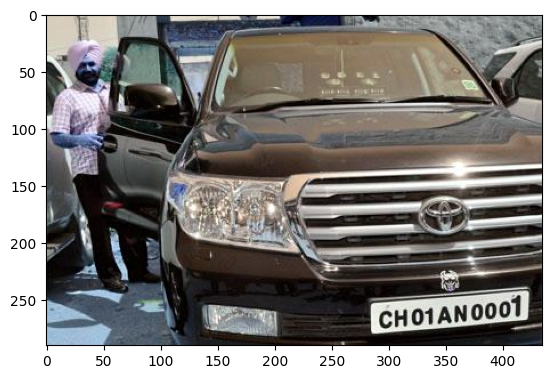

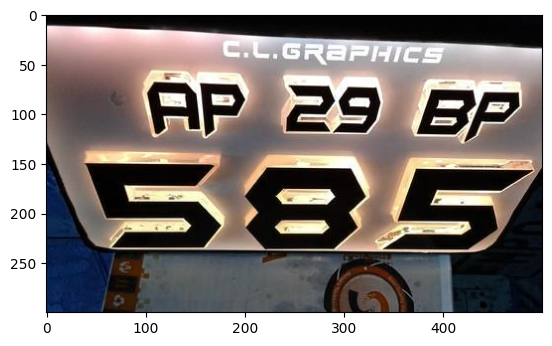

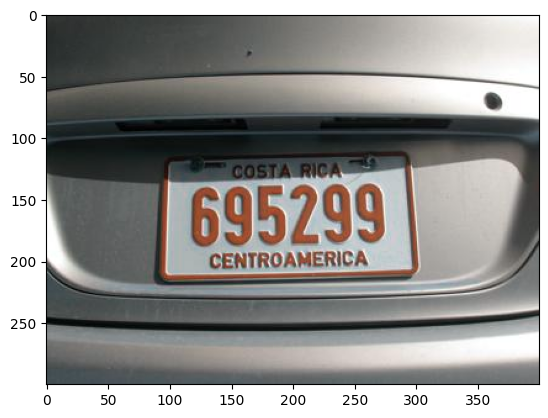

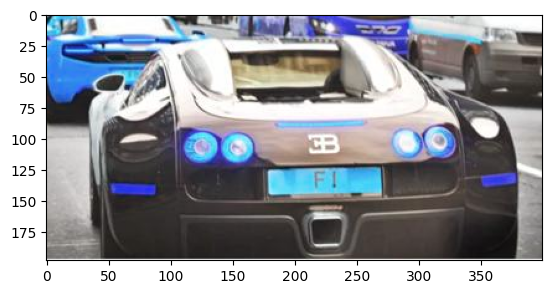

In [25]:
# 复制训练集的 XML 和 PNG 文件
for file in os.listdir(train_dir):
    if file.endswith(".xml"):
        source_path = os.path.join(train_dir, file)
        destination_path = os.path.join(label_dir, "train", file)
        print(f"复制 XML 文件: {source_path} -> {destination_path}")
        shutil.copy(source_path, destination_path)
    if file.endswith(".png"):  # 修改后缀检查为 .png
        source_path = os.path.join(train_dir, file)
        image = Image.open(source_path)
        image = image.convert("RGB")  # 将 PNG 文件转换为 RGB 格式
        new_filename = os.path.splitext(file)[0] + ".jpg"  # 保存为 JPG 格式
        save_path = os.path.join(image_dir, "train", new_filename)
        print(f"复制 PNG 文件并转换为 JPG: {source_path} -> {save_path}")
        image.save(save_path, "JPEG")

# 复制测试集的 XML 和 PNG 文件
for file in os.listdir(test_dir):
    if file.endswith(".xml"):
        source_path = os.path.join(test_dir, file)
        destination_path = os.path.join(label_dir, "val", file)
        print(f"复制 XML 文件: {source_path} -> {destination_path}")
        shutil.copy(source_path, destination_path)
    if file.endswith(".png"):  # 修改后缀检查为 .png
        source_path = os.path.join(test_dir, file)
        image = Image.open(source_path)
        image = image.convert("RGB")  # 将 PNG 文件转换为 RGB 格式
        new_filename = os.path.splitext(file)[0] + ".jpg"  # 保存为 JPG 格式
        save_path = os.path.join(image_dir, "val", new_filename)
        print(f"复制 PNG 文件并转换为 JPG: {source_path} -> {save_path}")
        image.save(save_path, "JPEG")

# 查看训练集图像文件夹中是否有文件
train_images = os.listdir(os.path.join(image_dir, "train"))
print("训练集图像文件数量:", len(train_images))
print("训练集图像示例:", train_images[:5])  # 查看前5个文件名

# 查看验证集图像文件夹中是否有文件
val_images = os.listdir(os.path.join(image_dir, "val"))
print("验证集图像文件数量:", len(val_images))
print("验证集图像示例:", val_images[:5])  # 查看前5个文件名




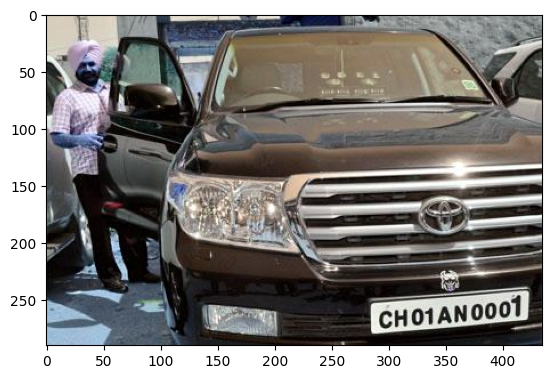

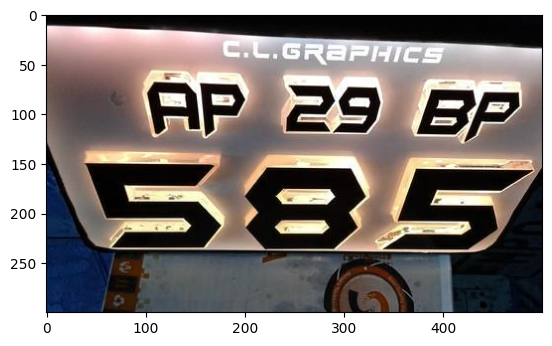

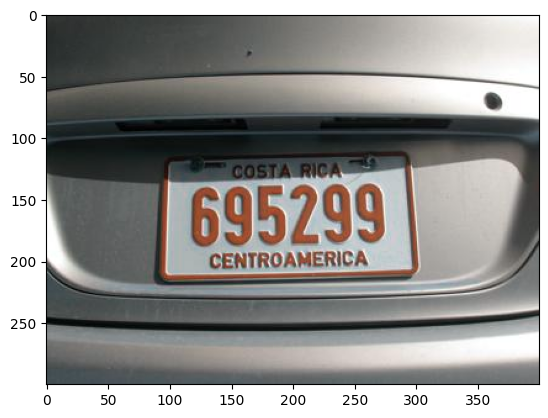

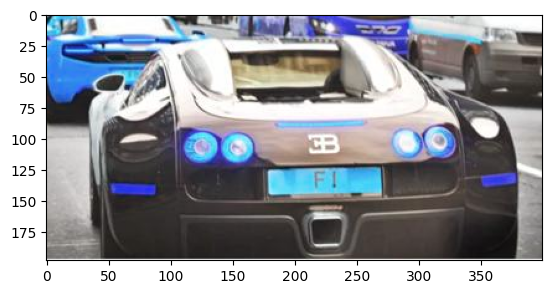

In [26]:
# 可视化训练数据集的前四张图片
for idx, image in enumerate(os.listdir(os.path.join(image_dir, "train"))):
    img = cv2.imread(os.path.join(image_dir, "train", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

In [35]:
# 定义数据字典用于存储训练和验证集的标签信息
df_train = {'name': [], 'label': [], 'width': [], 'height': [], 'xmin': [], 'ymin': [], 'xmax': [], 'ymax': []}
df_val = {'name': [], 'label': [], 'width': [], 'height': [], 'xmin': [], 'ymin': [], 'xmax': [], 'ymax': []}

# 用于解析 XML 文件，提取标签数据的函数
def parse_annotations(xml_dir, data_dict):
    for idx, anno in enumerate(glob.glob(xml_dir + '/*.xml')):
        tree = ET.parse(anno)
        root = tree.getroot()
        width, height = None, None

        # 遍历 XML 结构并提取信息
        for item in root.iter():
            if item.tag == 'size':
                for attr in list(item):
                    if attr.tag == 'width':
                        width = int(round(float(attr.text)))
                    if attr.tag == 'height':
                        height = int(round(float(attr.text)))
            if item.tag == 'object':
                for attr in list(item):
                    if 'name' in attr.tag:
                        label = attr.text
                        data_dict['label'].append(label)
                        data_dict['width'].append(width)
                        data_dict['height'].append(height)
                        data_dict['name'].append(anno.split('/')[-1][0:-4])
                    if 'bndbox' in attr.tag:
                        for dim in attr:
                            if dim.tag == 'xmin':
                                xmin = int(round(float(dim.text)))
                                data_dict['xmin'].append(xmin)
                            if dim.tag == 'ymin':
                                ymin = int(round(float(dim.text)))
                                data_dict['ymin'].append(ymin)
                            if dim.tag == 'xmax':
                                xmax = int(round(float(dim.text)))
                                data_dict['xmax'].append(xmax)
                            if dim.tag == 'ymax':
                                ymax = int(round(float(dim.text)))
                                data_dict['ymax'].append(ymax)

# 解析训练和验证集的 XML 文件
label_dir = "/content/drive/MyDrive/License_Plate/Final_data/labels"
parse_annotations(label_dir + "/train", df_train)
parse_annotations(label_dir + "/val", df_val)

正在读取图片: /content/drive/MyDrive/License_Plate/Final_data/images/train/Cars218.jpg


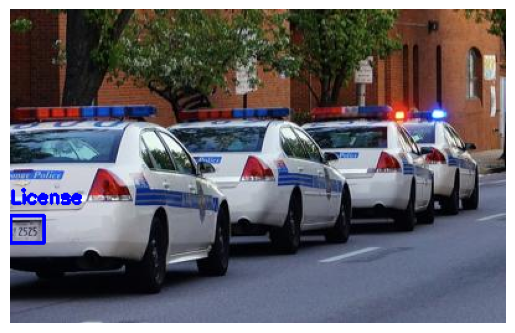

In [43]:
# 显示训练集中的第1张图片
image_dir = "/content/drive/MyDrive/License_Plate/Final_data/images/train"
idx = 90  # 第1张图片的索引

# 构建图片路径
image_path = f"{image_dir}/{df_train['name'][idx]}.jpg"
print(f"正在读取图片: {image_path}")

# 读取图片
img = cv2.imread(image_path)

if img is None:
    print(f"图片无法读取: {image_path}")
else:
    # 获取边界框坐标和标签
    xmin, ymin, xmax, ymax = df_train['xmin'][idx], df_train['ymin'][idx], df_train['xmax'][idx], df_train['ymax'][idx]
    label = "License"  # 固定显示为 License

    # 绘制边界框
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

    # 计算文本位置，将 License 标签显示在框的上方
    text_position = (xmin, ymin - 10)  # 将文本放在框的上方
    cv2.putText(img, label, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # 将 BGR 转换为 RGB，以便 Matplotlib 正确显示
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 显示图片
    plt.imshow(img_rgb)
    plt.axis('off')  # 隐藏坐标轴
    plt.show()

In [36]:
import pandas as pd
train_df = pd.DataFrame(df)
val_df=pd.DataFrame(df2)
#df1.head()
val_df.head()

,name,label,width,height,xmin,ymin,xmax,ymax
0,Cars111,licence,600,338,319,165,478,204
1,Cars125,licence,400,260,280,196,355,257
2,Cars110,licence,400,267,286,133,328,159
3,Cars123,licence,400,300,159,221,237,242
4,Cars14,licence,400,225,94,118,274,163


In [45]:
train_df["name"][index]
filtered_df = train_df[train_df['name'] == train_df["name"][index]]
print(filtered_df)

      name    label  width  height  xmin  ymin  xmax  ymax
3  Cars135  licence    400     225   260   184   319   211


In [46]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    139 non-null    object
 1   label   139 non-null    object
 2   width   139 non-null    int64 
 3   height  139 non-null    int64 
 4   xmin    139 non-null    int64 
 5   ymin    139 non-null    int64 
 6   xmax    139 non-null    int64 
 7   ymax    139 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 8.8+ KB


In [48]:
print(train_df['label'].unique())
print(val_df['label'].unique())

label_map = { 'licence': 0}

train_df['class'] = train_df['label'].map(label_map)
val_df['class'] = val_df['label'].map(label_map)

['licence']
['licence']


In [49]:
train_df.head()

,name,label,width,height,xmin,ymin,xmax,ymax,class
0,Cars132,licence,400,225,23,190,56,198,0
1,Cars132,licence,400,225,378,188,400,200,0
2,Cars140,licence,435,290,283,239,424,286,0
3,Cars135,licence,400,225,260,184,319,211,0
4,Cars139,licence,400,300,315,189,337,197,0


In [52]:
# Training data
train_df['x_center'] = (train_df['xmin']+train_df['xmax'])/(2*train_df["width"])
train_df['y_center'] = (train_df['ymin']+train_df['ymax'])/(2*train_df["height"])
train_df['box_width'] = (train_df['xmax']-train_df['xmin'])/ train_df["width"]
train_df['box_height'] = (train_df['ymax']-train_df['ymin'])/train_df["height"]

#Validation data
val_df['x_center'] = (val_df['xmin']+val_df['xmax'])/(2*val_df["width"])
val_df['y_center'] = (val_df['ymin']+val_df['ymax'])/(2*val_df["height"])
val_df['box_width'] = (val_df['xmax']-val_df['xmin'])/ val_df["width"]
val_df['box_height'] = (val_df['ymax']-val_df['ymin'])/val_df["height"]

train_df.head()

,name,label,width,height,xmin,ymin,xmax,ymax,class,x_center,y_center,box_width,box_height
0,Cars132,licence,400,225,23,190,56,198,0,0.098750,0.862222,0.082500,0.035556
1,Cars132,licence,400,225,378,188,400,200,0,0.972500,0.862222,0.055000,0.053333
2,Cars140,licence,435,290,283,239,424,286,0,0.812644,0.905172,0.324138,0.162069
3,Cars135,licence,400,225,260,184,319,211,0,0.723750,0.877778,0.147500,0.120000
4,Cars139,licence,400,300,315,189,337,197,0,0.815000,0.643333,0.055000,0.026667


In [53]:
#training
print("before deleting (train data): " , train_df.shape)
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
print("after deleting(train_data): " ,train_df.shape)

#validation
print("before deleting (val data): " , val_df.shape)
val_df.replace([np.inf, -np.inf], np.nan, inplace=True)
val_df.dropna(inplace=True)
print("after deleting(val data): " , val_df.shape)


before deleting (train data):  (332, 13)
after deleting(train_data):  (332, 13)
before deleting (val data):  (139, 13)
after deleting(val data):  (139, 13)


In [54]:
train_df = train_df.astype(str)
val_df = val_df.astype(str)

filtered_df = train_df[train_df['name'] == train_df["name"][100]]
(filtered_df.head(15))

,name,label,width,height,xmin,ymin,xmax,ymax,class,x_center,y_center,box_width,box_height
100,Cars189,licence,435,290,285,241,423,286,0,0.8137931034482758,0.9086206896551724,0.31724137931034485,0.15517241379310345


In [55]:
#file_name = [x.split('.')[0] for x in df1["name"]]

#TRAINING DATA
#finding all the unique names:
unique_names= train_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = train_df[train_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/train/{name}.txt', 'w') as file:
            file.write(text)
#############################################################################################
#VALIDATION DATA
#finding all the unique names:
unique_names= val_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = val_df[val_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/val/{name}.txt', 'w') as file:
            file.write(text)

In [62]:
# 定义图片和标签的路径
image_dir = "/content/drive/MyDrive/License_Plate/Final_data/images"
label_dir = "/content/drive/MyDrive/License_Plate/Final_data/labels"

# 获取训练集和验证集的图片和标签文件列表
train_images = glob.glob(os.path.join(image_dir, "train", '*.jpg'))
train_labels = glob.glob(os.path.join(label_dir, "train", '*.txt'))
val_images = glob.glob(os.path.join(image_dir, "val", '*.jpg'))
val_labels = glob.glob(os.path.join(label_dir, "val", '*.txt'))

# 打印文件数量以检查是否路径正确
print("训练集图片数量:", len(train_images))
print("训练集标签数量:", len(train_labels))
print("验证集图片数量:", len(val_images))
print("验证集标签数量:", len(val_labels))

训练集图片数量: 302
训练集标签数量: 302
验证集图片数量: 131
验证集标签数量: 131


In [63]:
# 检查训练集图片和标签的匹配情况
image_files_train = {file.split("/")[-1].split(".")[0] for file in train_images}
label_files_train = {file.split("/")[-1].split(".")[0] for file in train_labels}
missing_labels = image_files_train - label_files_train
missing_images = label_files_train - image_files_train

print("训练集中缺少标签的图片文件:", missing_labels)
print("训练集中缺少图片的标签文件:", missing_images)

# 同样检查验证集
image_files_val = {file.split("/")[-1].split(".")[0] for file in val_images}
label_files_val = {file.split("/")[-1].split(".")[0] for file in val_labels}
missing_labels_val = image_files_val - label_files_val
missing_images_val = label_files_val - image_files_val

print("验证集中缺少标签的图片文件:", missing_labels_val)
print("验证集中缺少图片的标签文件:", missing_images_val)


训练集中缺少标签的图片文件: set()
训练集中缺少图片的标签文件: set()
验证集中缺少标签的图片文件: set()
验证集中缺少图片的标签文件: set()


In [65]:
# 训练数据集中的多余文件
extra_images_train = image_files_train - label_files_train  # 存在图片文件但没有对应标签的文件
extra_labels_train = label_files_train - image_files_train  # 存在标签文件但没有对应图片的文件

# 输出结果
print(f"Training Extra images (without corresponding labels): {extra_images_train}")
print(f"Training Extra labels (without corresponding images): {extra_labels_train}")

# 验证数据集中的多余文件
extra_images_val = image_files_val - label_files_val  # 存在图片文件但没有对应标签的文件
extra_labels_val = label_files_val - image_files_val  # 存在标签文件但没有对应图片的文件

# 输出结果
print(f"Validation Extra images (without corresponding labels): {extra_images_val}")
print(f"Validation Extra labels (without corresponding images): {extra_labels_val}")


Training Extra images (without corresponding labels): set()
Training Extra labels (without corresponding images): set()
Validation Extra images (without corresponding labels): set()
Validation Extra labels (without corresponding images): set()


In [66]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

from ultralytics import YOLO

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/107.7 GB disk)


In [67]:
model = YOLO('yolov8s.pt') # pretrained model

100%|██████████| 21.5M/21.5M [00:00<00:00, 77.9MB/s]


In [68]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [69]:
%%writefile config.yaml
path: /content/drive/MyDrive/License_Plate/Final_data
train: /content/drive/MyDrive/License_Plate/Final_data/images/train
#test: (test dataset folder path)
val: /content/drive/MyDrive/License_Plate/Final_data/images/val

# Classes
nc: 1  # 将类别数量更改为数据集的类别数量（假设为1个类别）

# Class names
# 更新类别名称
names:
  0: licence


Writing config.yaml


In [70]:
model.train(data="config.yaml",epochs=5,patience=5,batch=8, lr0=0.0005,imgsz=640)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=5, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None

100%|██████████| 755k/755k [00:00<00:00, 15.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/train... 302 images, 0 backgrounds, 0 corrupt: 100%|██████████| 302/302 [00:05<00:00, 60.09it/s]


train: New cache created: /content/drive/MyDrive/License_Plate/Final_data/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:02<00:00, 55.80it/s]


val: New cache created: /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.579      3.159      1.312         13        640: 100%|██████████| 38/38 [12:11<00:00, 19.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:21<00:00,  9.06s/it]

                   all        131        139      0.754      0.691      0.762        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.549       1.45       1.33          9        640: 100%|██████████| 38/38 [12:02<00:00, 19.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:22<00:00,  9.17s/it]

                   all        131        139      0.703      0.459      0.588      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.528      1.385      1.264         13        640: 100%|██████████| 38/38 [12:03<00:00, 19.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:17<00:00,  8.66s/it]

                   all        131        139      0.739      0.631      0.686      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.528      1.243      1.314          9        640: 100%|██████████| 38/38 [11:51<00:00, 18.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:19<00:00,  8.85s/it]

                   all        131        139      0.697      0.695      0.719      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.451      1.051      1.241         17        640: 100%|██████████| 38/38 [11:49<00:00, 18.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:22<00:00,  9.15s/it]

                   all        131        139      0.911      0.727      0.864      0.452



5 epochs completed in 1.117 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:17<00:00,  8.66s/it]


                   all        131        139      0.886      0.727      0.864      0.451
Speed: 3.0ms preprocess, 568.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cf0337e7c40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [71]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/License_Plate/Final_data/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100%|██████████| 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [01:14<00:00,  4.37s/it]


                   all        131        139      0.878      0.727       0.86      0.453
Speed: 2.7ms preprocess, 543.4ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train2


0.7272860245043192

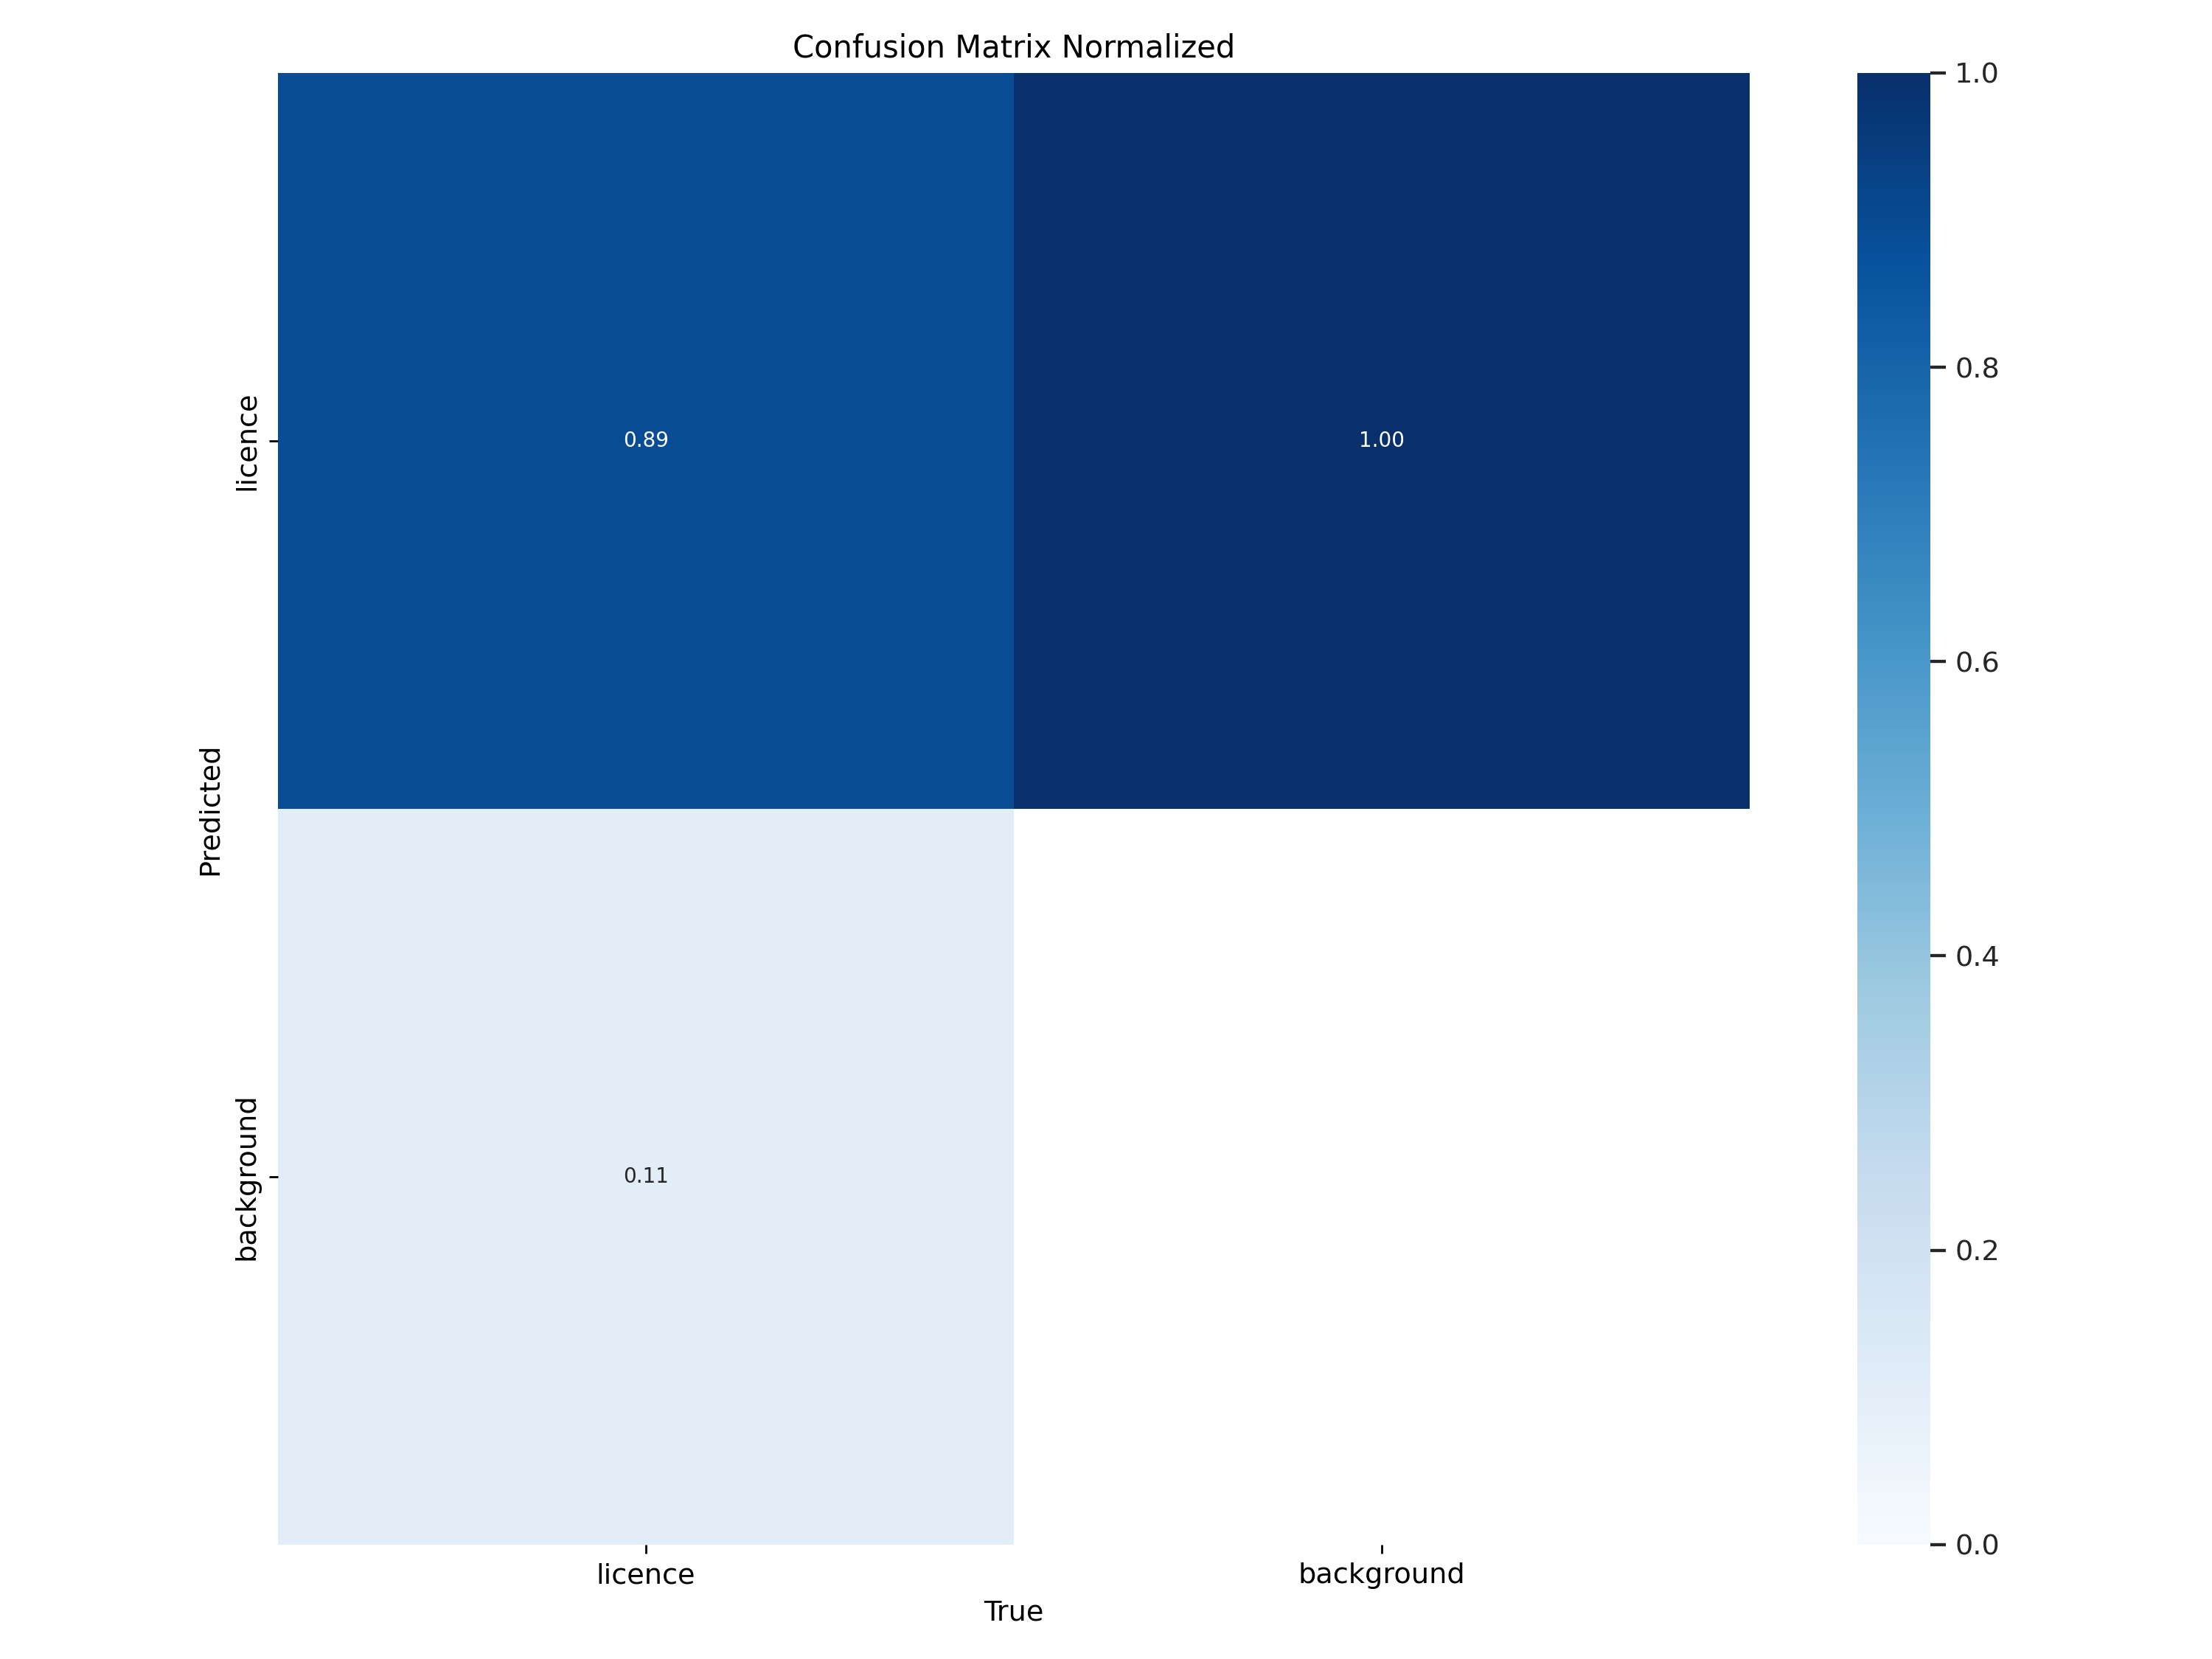

In [72]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/train/confusion_matrix_normalized.png')

In [73]:
# 从根目录或 Google Drive 中查找
search_dir = "/content/"  # 或者 "/content/drive/MyDrive/"，视情况而定

# 遍历目录及其子目录查找文件
for root, dirs, files in os.walk(search_dir):
    if "best.pt" in files:
        print("Found best.pt at:", os.path.join(root, "best.pt"))
        break

Found best.pt at: /content/runs/detect/train/weights/best.pt



0: 448x640 1 licence, 454.5ms
Speed: 4.0ms preprocess, 454.5ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict10


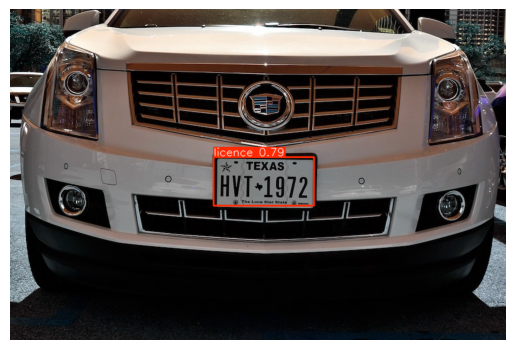

In [86]:
import requests
from io import BytesIO
from PIL import Image

# 加载自定义模型
model = YOLO('/content/runs/detect/train/weights/best.pt')  # 加载训练好的 YOLO 模型

# 下载图片
url = "https://www.serviceasap.com/media/zoo/images/ASAPTX_MayBlog5_LicensePlateRecognition_CorpusChristiTX__92d4e770e7018f6104fa17119bf88630.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# 使用模型进行预测，设置置信度和 IoU 阈值
results = model(img, conf=0.6, iou=0.7, save=True)

# 提取检测结果中的信息
boxes = results[0].boxes  # 获取检测到的边界框信息

# 筛选重复检测框
filtered_boxes = []
for box in boxes:
    box_data = box.xyxy[0].tolist()  # 边界框坐标 (xmin, ymin, xmax, ymax)
    score = box.conf  # 置信度
    if score > 0.6:  # 只保留高置信度的框
        filtered_boxes.append(box)

# 绘制筛选后的结果
result_img = results[0].plot(filtered_boxes)  # 绘制筛选后的框

# 使用 matplotlib 显示图像
plt.imshow(result_img)
plt.axis('off')  # 隐藏坐标轴
plt.show()

In [95]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [104]:
!pip install easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 15.2 MB/s eta 0:00:00



0: 448x640 1 licence, 430.9ms
Speed: 4.6ms preprocess, 430.9ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict54


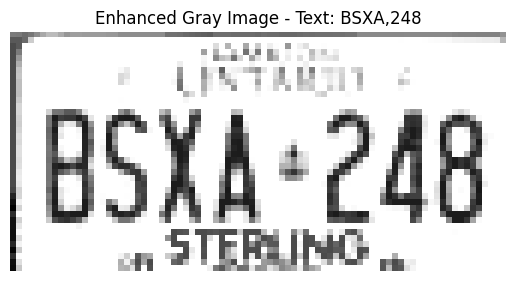

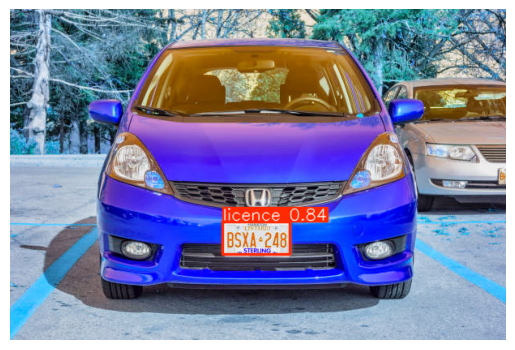

In [140]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import requests
from io import BytesIO
from PIL import Image, ImageEnhance

# 初始化 EasyOCR 读取器
reader = easyocr.Reader(['en'], gpu=True)

# 加载自定义模型
model = YOLO('/content/runs/detect/train/weights/best.pt')  # 加载训练好的 YOLO 模型

# 下载图片
url = "https://media.istockphoto.com/id/1297483745/photo/honda-fit-small-car.jpg?s=612x612&w=0&k=20&c=_DhC62KSha8cWiqTXmkAKzRH81xpDn9nHwtHm4Nlsdg="
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# 将图像转换为 RGB 模式（确保它适合增强处理）
if img.mode != 'RGB':
    img = img.convert('RGB')

# 使用模型进行预测，设置置信度和 IoU 阈值
results = model(img, conf=0.6, iou=0.7, save=True)

# 提取检测结果中的信息
boxes = results[0].boxes  # 获取检测到的边界框信息

# 筛选高置信度的检测框并处理
for idx, box in enumerate(boxes):
    box_data = box.xyxy[0].tolist()  # 边界框坐标 (xmin, ymin, xmax, ymax)
    score = box.conf  # 置信度
    if score > 0.6:  # 只保留高置信度的框
        # 获取边界框坐标
        x1, y1, x2, y2 = map(int, box_data[:4])

        # 将原始图像转换为 OpenCV 格式（BGR）
        img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

        # 裁剪出车牌区域
        plate = img_cv[y1:y2, x1:x2]

        # 转换为 PIL 格式以增强亮度和对比度
        plate_pil = Image.fromarray(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))

        # 增强车牌区域的亮度和对比度
        contrast_enhancer = ImageEnhance.Contrast(plate_pil)
        plate_pil = contrast_enhancer.enhance(2)  # 增加对比度
        brightness_enhancer = ImageEnhance.Brightness(plate_pil)
        plate_pil = brightness_enhancer.enhance(1.5)  # 增加亮度

        # 将增强后的图像转换为灰度图像
        plate_gray = cv2.cvtColor(np.array(plate_pil), cv2.COLOR_RGB2GRAY)

        # 使用 EasyOCR 识别增强后的灰度图像
        gray_text = reader.readtext(plate_gray, detail=0)

        # 输出识别结果
        #print(f"识别的车牌（增强后的灰度图像）: {''.join(gray_text)}")

        # 显示增强后的灰度图像
        plt.imshow(plate_gray, cmap='gray')
        plt.title(f'Enhanced Gray Image - Text: {"".join(gray_text)}')
        plt.axis('off')
        plt.show()

# 绘制筛选后的结果
result_img = results[0].plot()  # 绘制筛选后的框

# 使用 matplotlib 显示检测结果图像
plt.imshow(result_img)
plt.axis('off')  # 隐藏坐标轴
plt.show()
